#Import ข้อมูล

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#อ่านไฟล์ของ Data Lung Cancer
df = pd.read_csv('/content/drive/MyDrive/VirtualBox/Lung Cancer.csv')
display(df)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


#Explore ข้อมูล

In [4]:
#เช็คขนาดของข้อมูล
df.shape

(890000, 17)

In [5]:
#drop คอลัมน์ id
df = df.drop(columns=['id'])

In [6]:
#เช็คดูข้อมูลต่างๆ type แต่ละคอลัมน์
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   age                 890000 non-null  float64
 1   gender              890000 non-null  object 
 2   country             890000 non-null  object 
 3   diagnosis_date      890000 non-null  object 
 4   cancer_stage        890000 non-null  object 
 5   family_history      890000 non-null  object 
 6   smoking_status      890000 non-null  object 
 7   bmi                 890000 non-null  float64
 8   cholesterol_level   890000 non-null  int64  
 9   hypertension        890000 non-null  int64  
 10  asthma              890000 non-null  int64  
 11  cirrhosis           890000 non-null  int64  
 12  other_cancer        890000 non-null  int64  
 13  treatment_type      890000 non-null  object 
 14  end_treatment_date  890000 non-null  object 
 15  survived            890000 non-nul

In [7]:
#เปลี่ยน type คอลัมน์ age จาก float เป็น int
df['age'] = df['age'].astype(int)

In [8]:
#เช็ค missing value แต่ละ คอลัมน์
df.isnull().sum()

,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0
hypertension,0


In [9]:
#เช็คการซ้ำของข้อมูล
df.duplicated().sum()

np.int64(0)

In [10]:
#เช็คค่าสถิติ ข้อมูล
df.describe()

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# สถิติสำหรับข้อมูลตัวอักษร/หมวดหมู่
print("\n--- สถิติเชิงหมวดหมู่ ---")
print(df.describe(include=['O']))


--- สถิติเชิงหมวดหมู่ ---
        gender country diagnosis_date cancer_stage family_history  \
count   890000  890000         890000       890000         890000   
unique       2      27           3651            4              2   
top       Male   Malta     2024-05-15    Stage III             No   
freq    445134   33367            306       222594         445181   

        smoking_status treatment_type end_treatment_date  
count           890000         890000             890000  
unique               4              4               4194  
top     Passive Smoker   Chemotherapy         2023-12-09  
freq            223170         223262                294  


In [12]:
df['country'].value_counts()

,count
country,
Malta,33367
Ireland,33243
Portugal,33208
France,33199
Sweden,33161
Croatia,33138
Greece,33052
Spain,33042
Netherlands,33040


/tmp/ipython-input-1639176313.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=country_counts.index, x=country_counts.values, palette='coolwarm')


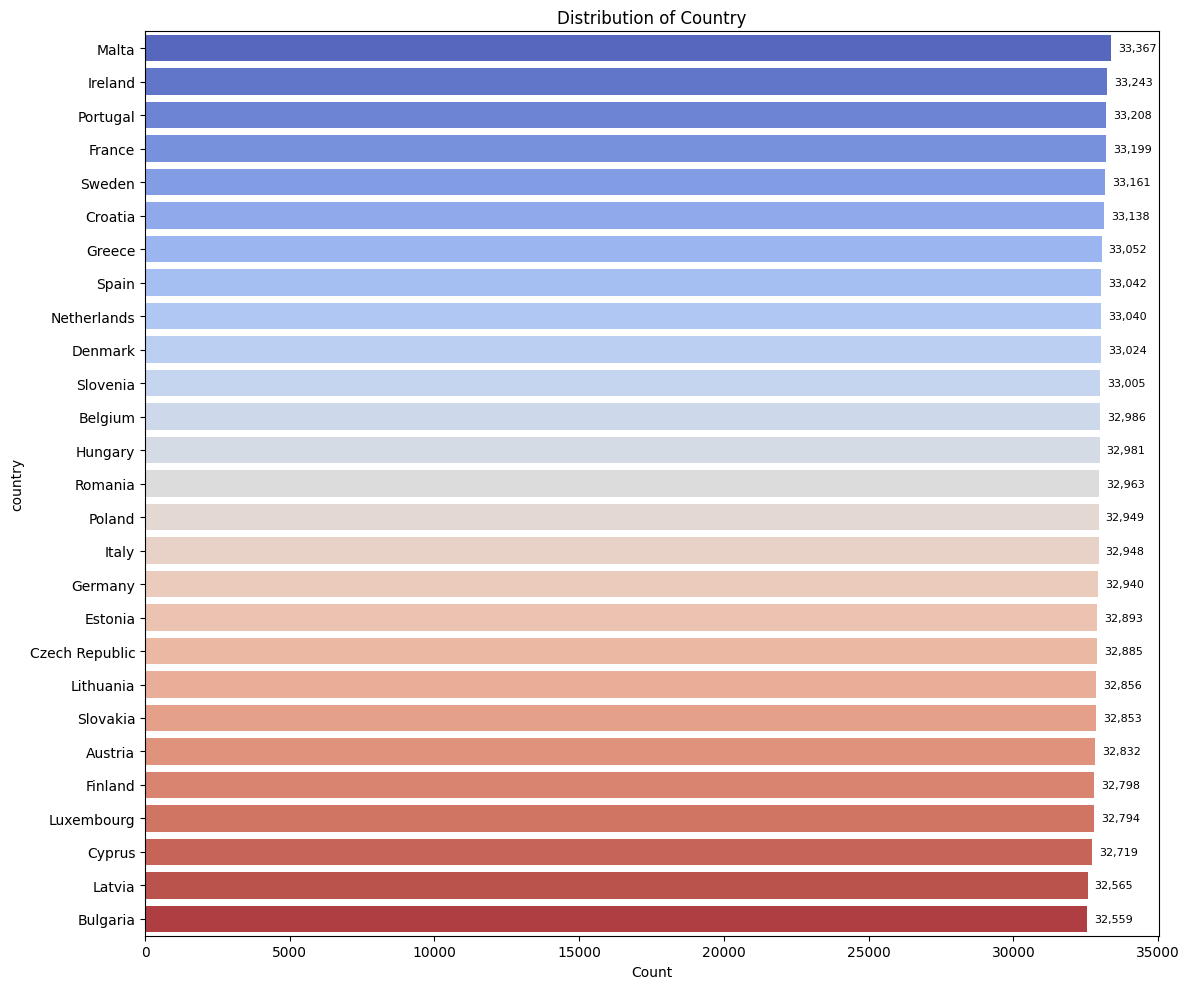

In [13]:
#กราฟแสดงจำนวนตามประเทศ (Country Distribution)
plt.figure(figsize=(12, 10)) # กำหนดขนาดกราฟให้สูงพอที่จะแสดงครบทุกประเทศ

# นับจำนวนข้อมูลในแต่ละประเทศ
country_counts = df['country'].value_counts()

# วาดกราฟแท่งแนวนอน (สังเกตว่าเราใส่ country ไว้ที่แกน y)
ax = sns.barplot(y=country_counts.index, x=country_counts.values, palette='coolwarm')

plt.title('Distribution of Country')
plt.xlabel('Count')

# โค้ดส่วนนี้สำหรับใส่ตัวเลขกำกับท้ายแท่งแนวนอน (ต่างจากฟังก์ชัน add_labels ข้างบนนิดหน่อย)
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}',
                (width, p.get_y() + p.get_height() / 2.),
                ha = 'left', va = 'center',
                xytext = (5, 0),
                textcoords = 'offset points',
                fontsize=8)

plt.tight_layout()
plt.show()

In [14]:
#จำนวนประเทศใน df
num_unique_countries = df['country'].nunique()
print(f"จำนวนประเทศทั้งหมด: {num_unique_countries}")

จำนวนประเทศทั้งหมด: 27


In [15]:
# ตั้งค่า Theme ของกราฟให้พื้นหลังสะอาดตา (Whitegrid)
sns.set(style="whitegrid")

# สร้างฟังก์ชันสำหรับใส่ตัวเลขกำกับบนแท่งกราฟ (เพื่อให้โค้ดส่วนอื่นสั้นลง)
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        # ใส่ตัวเลขจำนวนนับไว้ตรงกลางเหนือแท่งกราฟ
        ax.annotate(f'{int(height):,}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points',
                    fontsize=10)

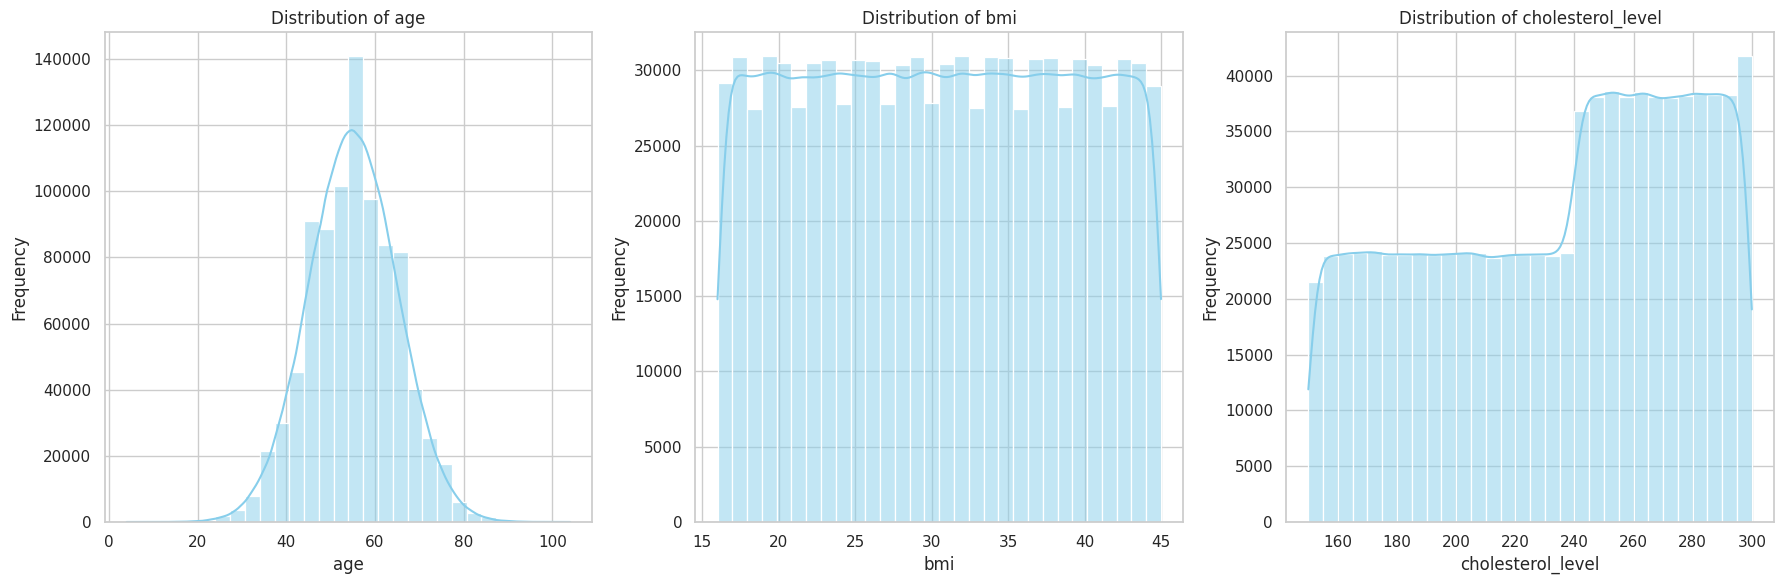

In [16]:
#กราฟข้อมูลตัวเลขต่อเนื่อง (Numerical Distributions) Histogram เพื่อดูการกระจายตัวของข้อมูลตัวเลข
num_features = ['age', 'bmi', 'cholesterol_level']

# สร้างเฟรมกราฟ 1 แถว 3 คอลัมน์
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(num_features):
    # วาด Histogram พร้อมเส้นโค้ง KDE (Kernel Density Estimate)
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='skyblue')

    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

/tmp/ipython-input-57098254.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-57098254.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-57098254.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-57098254.py:11: FutureWarning:

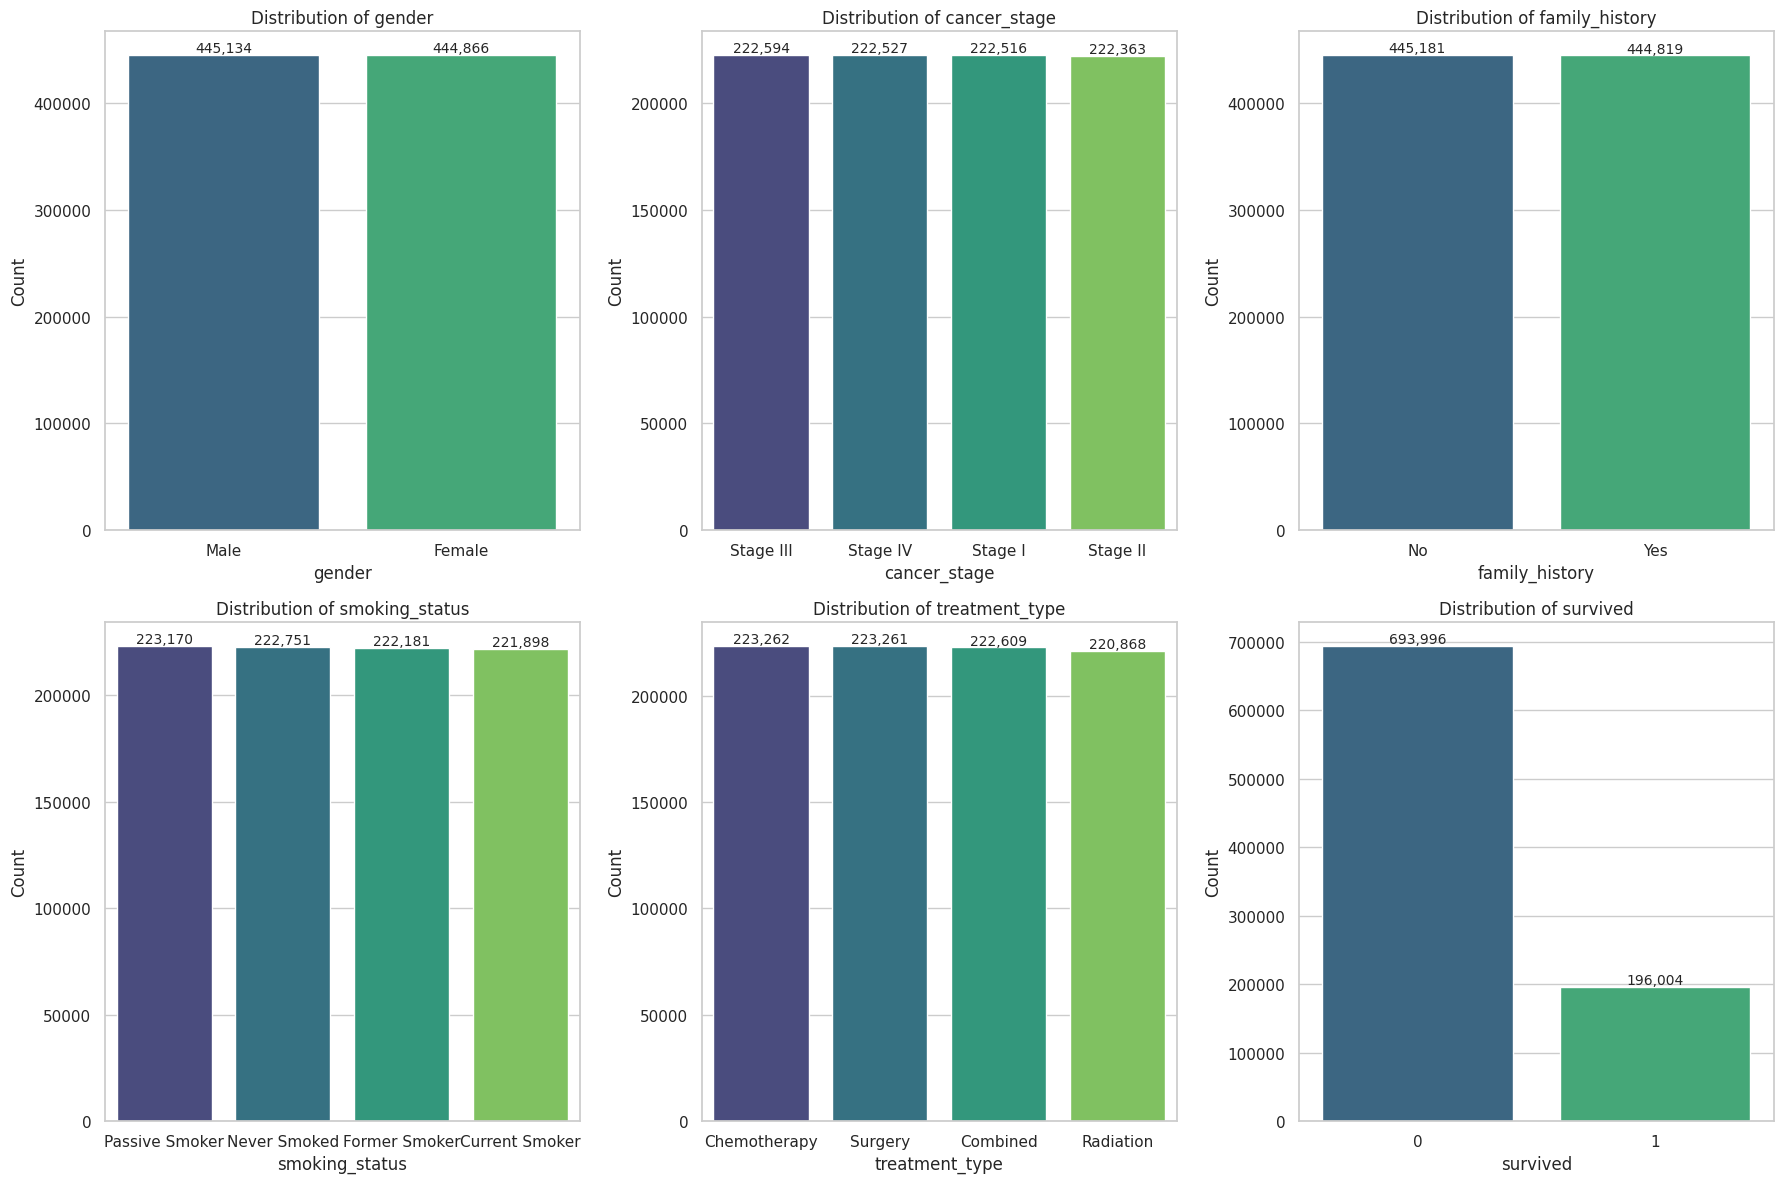

In [17]:
#กราฟข้อมูลกลุ่มทั่วไป (Categorical Data)
cat_features = ['gender', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type', 'survived']

# สร้างเฟรมกราฟขนาดใหญ่ 2 แถว 3 คอลัมน์
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten() # แปลงอาเรย์ 2 มิติให้เป็น 1 มิติเพื่อง่ายต่อการวนลูป

for i, col in enumerate(cat_features):
    # วาดกราฟแท่ง (Countplot)
    # order=... คือสั่งให้เรียงลำดับจากแท่งที่สูงที่สุดไปต่ำที่สุด
    sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', order=df[col].value_counts().index)

    # ตกแต่งชื่อกราฟและแกน
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')

    # เรียกใช้ฟังก์ชันใส่ตัวเลขที่เราสร้างไว้ตอนแรก
    add_labels(axes[i])

plt.tight_layout() # จัดระยะห่างอัตโนมัติไม่ให้ซ้อนทับกัน
plt.show()

/tmp/ipython-input-3693955716.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='magma')
/tmp/ipython-input-3693955716.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='magma')
/tmp/ipython-input-3693955716.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='magma')
/tmp/ipython-input-3693955716.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

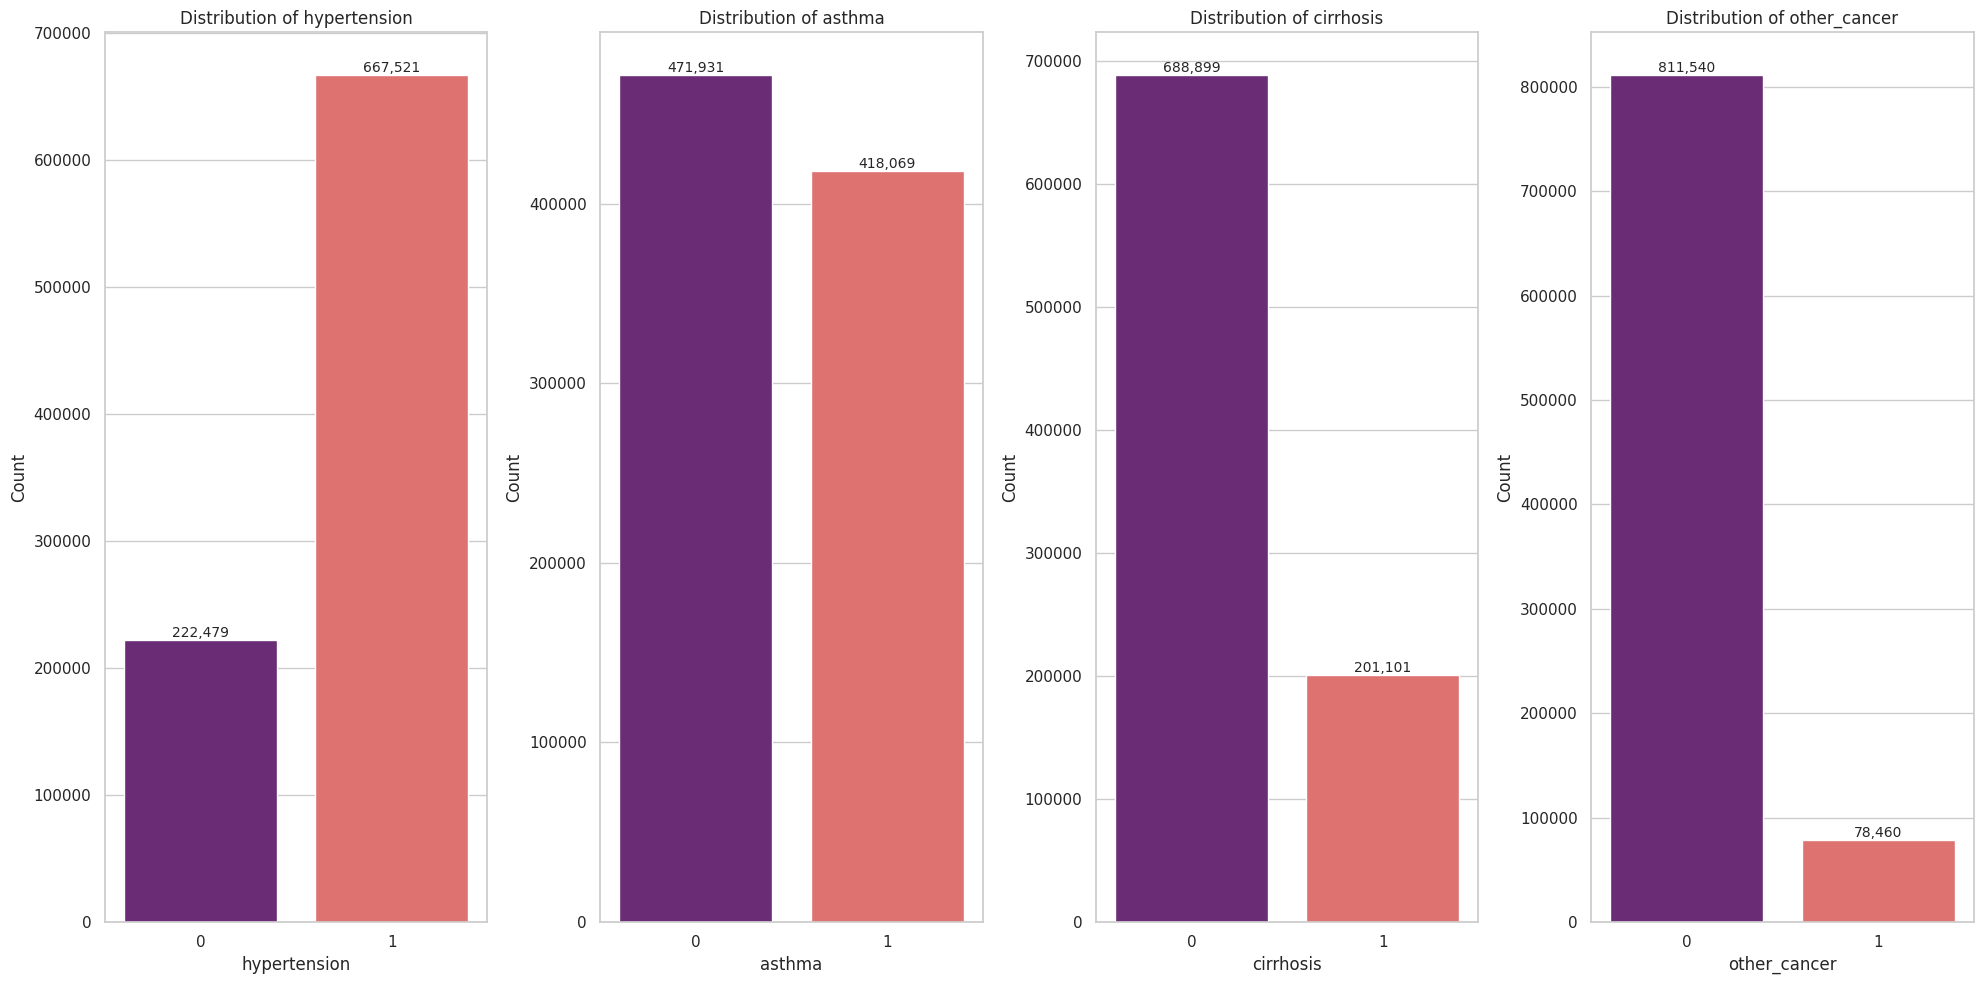

In [18]:
#กราฟข้อมูลสุขภาพแบบใช่/ไม่ใช่ (Binary Data)
bin_features = ['hypertension', 'asthma', 'cirrhosis', 'other_cancer']

# สร้างเฟรมกราฟแนวนอน 1 แถว 4 คอลัมน์
fig, axes = plt.subplots(1, 4, figsize=(20, 10))

for i, col in enumerate(bin_features):
    # วาดกราฟแท่ง
    sns.countplot(x=col, data=df, ax=axes[i], palette='magma')

    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')

    # ใส่ตัวเลขกำกับ
    add_labels(axes[i])

plt.tight_layout()
plt.show()

In [19]:
#การ tranfrom country
from sklearn.preprocessing import LabelEncoder

le_country_specific = LabelEncoder()
le_country_specific.fit(df['country'])

mapping = dict(zip(le_country_specific.classes_, range(len(le_country_specific.classes_))))

print("--- Country Label Encoding Mapping ---")
for country, code in mapping.items():
    print(f"{country}: {code}")

--- Country Label Encoding Mapping ---
Austria: 0
Belgium: 1
Bulgaria: 2
Croatia: 3
Cyprus: 4
Czech Republic: 5
Denmark: 6
Estonia: 7
Finland: 8
France: 9
Germany: 10
Greece: 11
Hungary: 12
Ireland: 13
Italy: 14
Latvia: 15
Lithuania: 16
Luxembourg: 17
Malta: 18
Netherlands: 19
Poland: 20
Portugal: 21
Romania: 22
Slovakia: 23
Slovenia: 24
Spain: 25
Sweden: 26


In [20]:
#Transform Data ให้อยู่ในรูปของตัวเลข
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['country'] = le.fit_transform(df['country'])
df['diagnosis_date'] = le.fit_transform(df['diagnosis_date'])
df['cancer_stage'] = le.fit_transform(df['cancer_stage'])
df['family_history'] = le.fit_transform(df['family_history'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['treatment_type'] = le.fit_transform(df['treatment_type'])
df['end_treatment_date'] = le.fit_transform(df['end_treatment_date'])
# Transform 'cancer_stage' เริ่มจาก  1 - 4
df['cancer_stage'] = df['cancer_stage'] + 1

print("Updated number of patients per cancer stage:")
print(df['cancer_stage'].value_counts().sort_index())

Updated number of patients per cancer stage:
cancer_stage
1    222516
2    222363
3    222594
4    222527
Name: count, dtype: int64


In [21]:
# gender 1 คือ male 0 คือ female , cancer_stage ระยะ 1-4 , family_history 1 = yes 0 = no , smoking_status 0 = Current Smoker, 1 = Former Smoker, 2 = Never Smoked , 3 = Passive Smoker
df

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64,1,26,673,1,1,3,29.4,199,0,0,1,0,0,1011,0
1,50,0,19,3244,3,1,3,41.2,280,1,1,0,0,3,3483,1
2,65,0,12,3229,3,1,1,44.0,268,1,1,0,0,1,3414,0
3,51,0,1,613,1,0,3,43.0,241,1,1,0,0,0,871,0
4,37,1,17,3467,1,0,3,19.7,178,0,0,0,0,1,3688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40,1,18,2951,4,0,3,44.8,243,1,1,1,0,2,3003,0
889996,62,0,4,482,2,1,1,21.6,240,0,0,0,0,3,928,0
889997,48,0,7,664,3,1,2,38.6,242,1,0,0,0,1,781,1
889998,67,0,23,568,4,1,1,18.6,194,1,1,0,0,0,1104,0


In [22]:
# คำนวณระยะเวลาการรักษา (เป็นจำนวนวัน)
df['treatment_duration_days'] = (df['end_treatment_date'] - df['diagnosis_date'])

# แสดงผลลัพธ์ 5 แถวแรก เฉพาะคอลัมน์ที่เกี่ยวข้อง
print(df[['diagnosis_date', 'end_treatment_date', 'treatment_duration_days']].head())

   diagnosis_date  end_treatment_date  treatment_duration_days
0             673                1011                      338
1            3244                3483                      239
2            3229                3414                      185
3             613                 871                      258
4            3467                3688                      221


In [23]:
# ลบคอลัมน์ 'diagnosis_date' และ 'end_treatment_date'
df = df.drop(columns=['diagnosis_date', 'end_treatment_date'])

In [24]:
df

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration_days
0,64,1,26,1,1,3,29.4,199,0,0,1,0,0,0,338
1,50,0,19,3,1,3,41.2,280,1,1,0,0,3,1,239
2,65,0,12,3,1,1,44.0,268,1,1,0,0,1,0,185
3,51,0,1,1,0,3,43.0,241,1,1,0,0,0,0,258
4,37,1,17,1,0,3,19.7,178,0,0,0,0,1,0,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40,1,18,4,0,3,44.8,243,1,1,1,0,2,0,52
889996,62,0,4,2,1,1,21.6,240,0,0,0,0,3,0,446
889997,48,0,7,3,1,2,38.6,242,1,0,0,0,1,1,117
889998,67,0,23,4,1,1,18.6,194,1,1,0,0,0,0,536


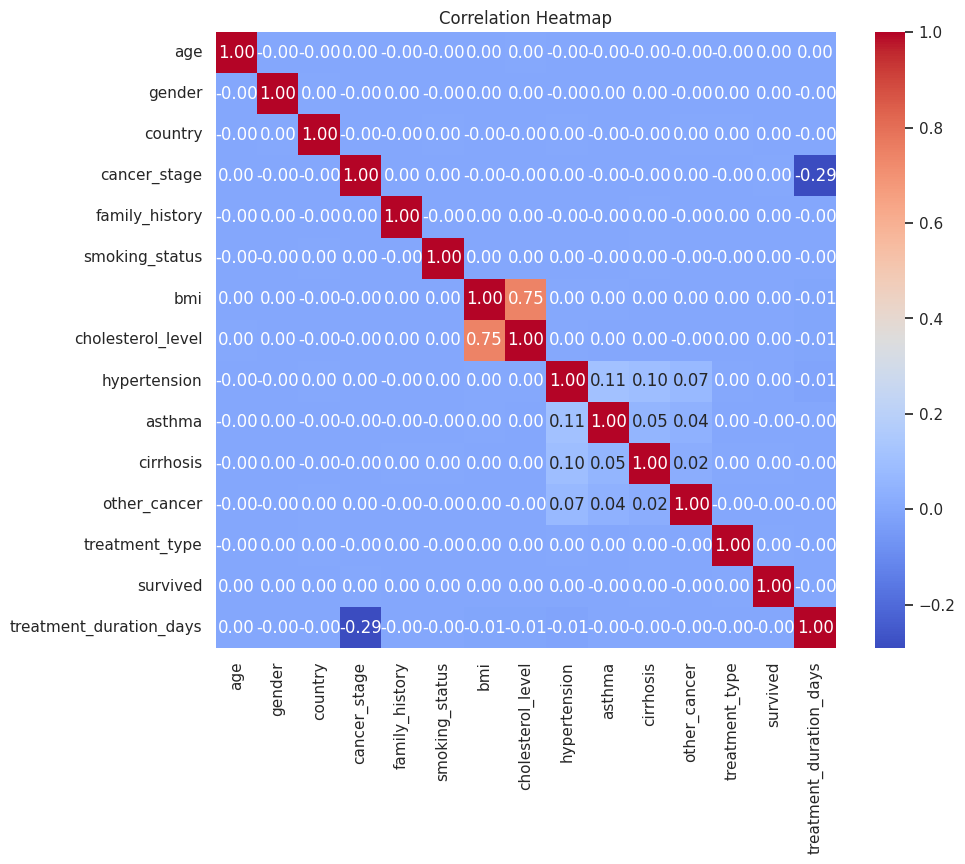

In [25]:
# ความสัมพันธ์ของตัวแปรตัวเลข (Correlation Matrix)
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Model

In [26]:
df

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration_days
0,64,1,26,1,1,3,29.4,199,0,0,1,0,0,0,338
1,50,0,19,3,1,3,41.2,280,1,1,0,0,3,1,239
2,65,0,12,3,1,1,44.0,268,1,1,0,0,1,0,185
3,51,0,1,1,0,3,43.0,241,1,1,0,0,0,0,258
4,37,1,17,1,0,3,19.7,178,0,0,0,0,1,0,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40,1,18,4,0,3,44.8,243,1,1,1,0,2,0,52
889996,62,0,4,2,1,1,21.6,240,0,0,0,0,3,0,446
889997,48,0,7,3,1,2,38.6,242,1,0,0,0,1,1,117
889998,67,0,23,4,1,1,18.6,194,1,1,0,0,0,0,536


In [27]:
#drop label ก่อนนำไปใช้ใน model
X = df.drop(columns=['survived'])
y= df['survived']

In [28]:
#การทำ SMOTE
from imblearn.over_sampling import SMOTE

print("Original training data shape:", X.shape, y.shape)
print("Original training target distribution:\n", y.value_counts())

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X1, y1 = smote.fit_resample(X, y)

print("\nResampled training data shape:", X1.shape, y1.shape)
print("Resampled training target distribution:\n", y1.value_counts())

# ปรับสเกล (Re-scale) ข้อมูลชุดฝึกสอน (Training data) ที่ผ่านการ Resample แล้วใหม่อีกครั้ง
# โดยทั่วไปแล้ว การ Fit Scaler (คำนวณค่าเพื่อปรับสเกล) บนข้อมูลที่ผ่านการ Resample แล้วจะดีกว่า
# หากการกระจายตัวของข้อมูล (Distribution) เปลี่ยนไปอย่างมาก เพื่อให้เป็นตัวแทนของชุดข้อมูลฝึกสอนชุดใหม่ได้อย่างถูกต้องแม่นยำ
#scaler_resampled = StandardScaler()
#X_train_resampled_scaled = scaler_resampled.fit_transform(X_train_resampled)

print("\nData balancing and re-scaling complete.")

Original training data shape: (890000, 14) (890000,)
Original training target distribution:
 survived
0    693996
1    196004
Name: count, dtype: int64

Resampled training data shape: (1387992, 14) (1387992,)
Resampled training target distribution:
 survived
0    693996
1    693996
Name: count, dtype: int64

Data balancing and re-scaling complete.


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# แบ่งเป็น Train set (80%) และ Test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

print("เตรียมข้อมูลเสร็จสิ้น พร้อมรันโมเดล")

เตรียมข้อมูลเสร็จสิ้น พร้อมรันโมเดล


In [30]:
#Model DecisionTree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    random_state=42
)

dt_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_pred = dt_model.predict(X_test)

print("Decision Tree (entropy) Accuracy:",
      accuracy_score(y_test, dt_pred))

print(classification_report(y_test, dt_pred))



Decision Tree (entropy) Accuracy: 0.6881797124629412
              precision    recall  f1-score   support

           0       0.67      0.74      0.70    138614
           1       0.71      0.63      0.67    138985

    accuracy                           0.69    277599
   macro avg       0.69      0.69      0.69    277599
weighted avg       0.69      0.69      0.69    277599



In [31]:
#Model KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(
    n_neighbors=3,
    metric='minkowski'
)

knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test,knn_pred))


KNN Accuracy: 0.7638968440088041
              precision    recall  f1-score   support

           0       0.91      0.58      0.71    138614
           1       0.69      0.94      0.80    138985

    accuracy                           0.76    277599
   macro avg       0.80      0.76      0.76    277599
weighted avg       0.80      0.76      0.76    277599



In [32]:
#Model Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.6451175976858706
              precision    recall  f1-score   support

           0       0.71      0.49      0.58    138614
           1       0.61      0.80      0.69    138985

    accuracy                           0.65    277599
   macro avg       0.66      0.64      0.64    277599
weighted avg       0.66      0.65      0.64    277599



#เปรียบเทียบ model

In [33]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN', 'Naive Bayes'],
    'Accuracy': [
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, nb_pred)
    ]
})

results


,Model,Accuracy
0,Decision Tree,0.688180
1,KNN,0.763897
2,Naive Bayes,0.645118


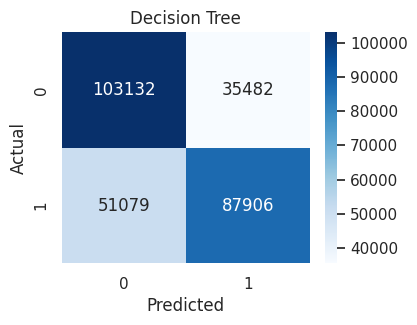

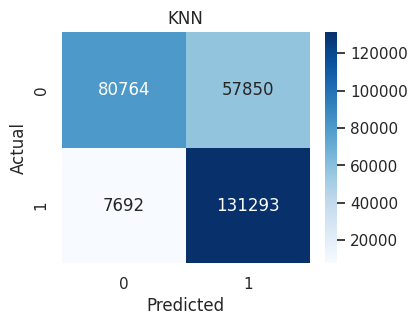

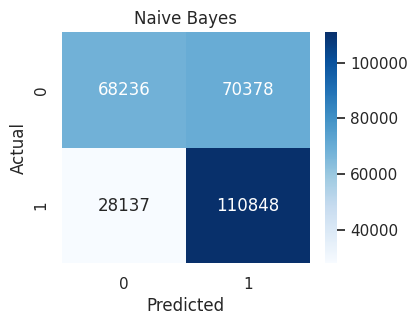

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

models_preds = {
    'Decision Tree': dt_pred,
    'KNN': knn_pred,
    'Naive Bayes': nb_pred
}

for model, pred in models_preds.items():
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(model)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


#Feature_selection

,0
bmi,0.345162
hypertension,0.153346
gender,0.095218
family_history,0.095082
asthma,0.086734
smoking_status,0.047350
treatment_type,0.047136
cancer_stage,0.045328
cirrhosis,0.028510
other_cancer,0.012401


<Axes: >

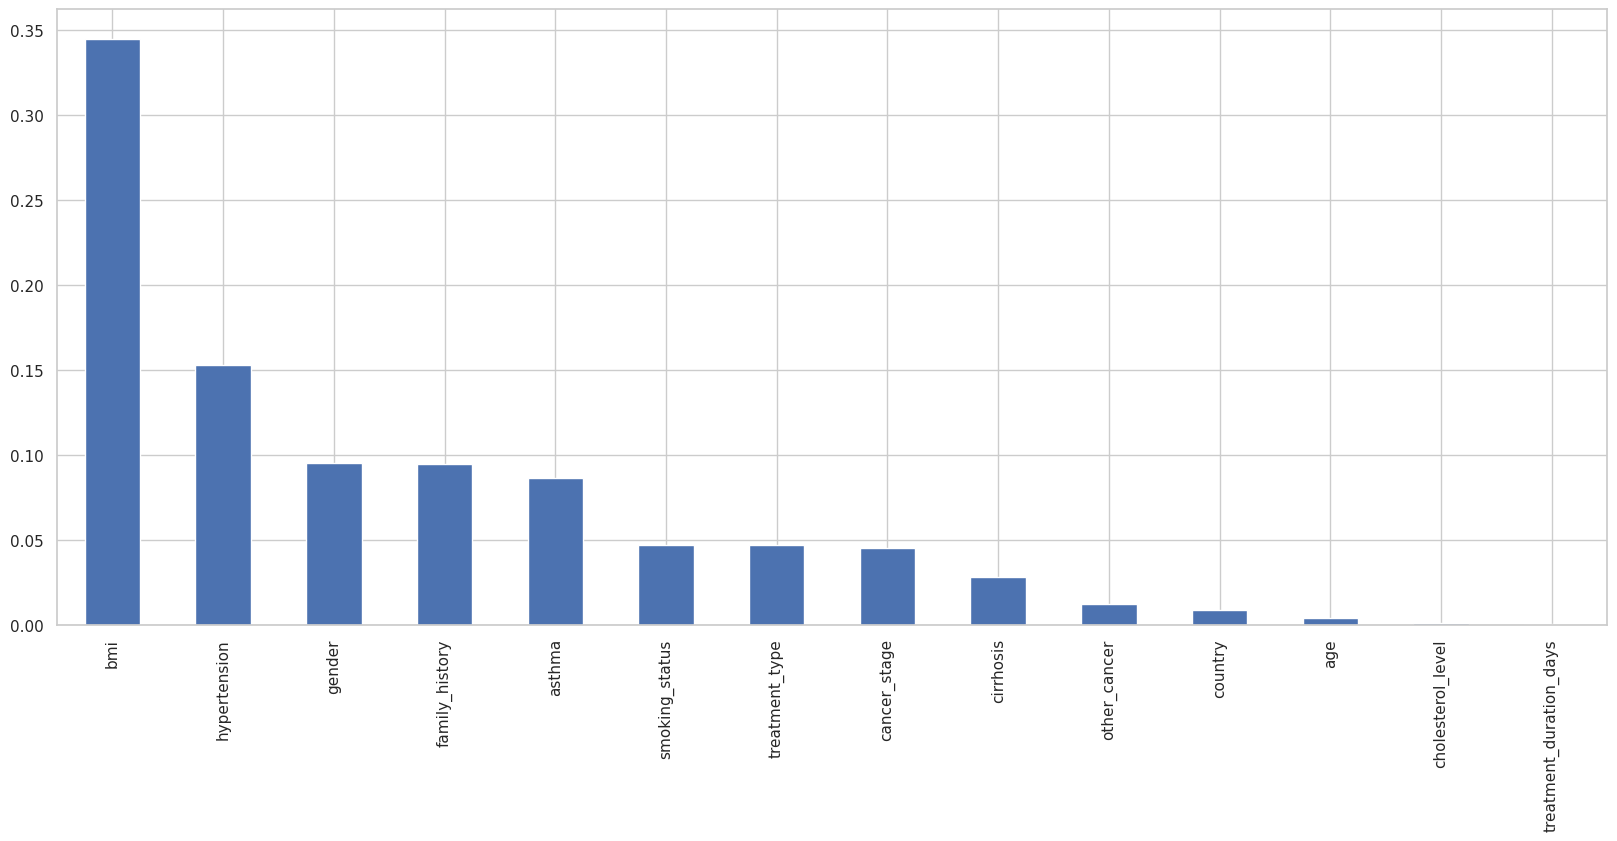

In [35]:
#การทำ feature_selection
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X1, y1)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns # Use the actual column names from X
display(mutual_info.sort_values(ascending=False)) # เรียงจากมากไปน้อย
display(mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8)))

In [36]:
X1

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,treatment_duration_days
0,64,1,26,1,1,3,29.400000,199,0,0,1,0,0,338
1,50,0,19,3,1,3,41.200000,280,1,1,0,0,3,239
2,65,0,12,3,1,1,44.000000,268,1,1,0,0,1,185
3,51,0,1,1,0,3,43.000000,241,1,1,0,0,0,258
4,37,1,17,1,0,3,19.700000,178,0,0,0,0,1,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387987,64,0,17,1,0,2,21.614642,202,1,0,1,0,2,415
1387988,51,0,24,3,0,1,36.729056,247,0,0,0,0,0,273
1387989,66,0,14,3,0,0,20.624642,200,1,0,0,0,2,38
1387990,51,0,14,2,1,1,20.911696,188,1,0,0,0,0,418


In [37]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

A = mutual_info.sort_values(ascending=False).index
A = np.array(A)

for i in range(len(A)):
    a = A[0:15-i]
    print(a)
    X = X1[a]
    #print(X)
    X_train,X_test,y_train,y_test = train_test_split(X,y1,test_size=0.2,random_state=42)
    KNN_model = KNeighborsClassifier(n_neighbors=3)
    KNN_model.fit(X_train,y_train)

    y_pred = KNN_model.predict(X_test)
    report_model = classification_report(y_test, y_pred, digits=4)
    report__model = accuracy_score(y_test, y_pred)
    print('accuracy : ',report__model)
    print(report_model)
    print('------------------------')

['bmi' 'hypertension' 'gender' 'family_history' 'asthma' 'smoking_status'
 'treatment_type' 'cancer_stage' 'cirrhosis' 'other_cancer' 'country'
 'age' 'cholesterol_level' 'treatment_duration_days']
accuracy :  0.7639076509641606
              precision    recall  f1-score   support

           0     0.9131    0.5827    0.7114    138614
           1     0.6942    0.9447    0.8003    138985

    accuracy                         0.7639    277599
   macro avg     0.8036    0.7637    0.7558    277599
weighted avg     0.8035    0.7639    0.7559    277599

------------------------
['bmi' 'hypertension' 'gender' 'family_history' 'asthma' 'smoking_status'
 'treatment_type' 'cancer_stage' 'cirrhosis' 'other_cancer' 'country'
 'age' 'cholesterol_level' 'treatment_duration_days']
accuracy :  0.7639076509641606
              precision    recall  f1-score   support

           0     0.9131    0.5827    0.7114    138614
           1     0.6942    0.9447    0.8003    138985

    accuracy              